<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

# DonorsChoose

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# Decision tree 8th Assinment

In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
print('done')

#!pip install -U -q PyDrive


done


In [19]:
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # links to google drive
# link='https://drive.google.com/open?id=18VAiuw3vfETGcuJOdicvkgQT0pSxF7Wy'
# link3='https://drive.google.com/open?id=1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j'
# flufff, id2 = link3.split('=')
# print (id2) # Verify that you have everything after '='
# downloaded = drive.CreateFile({'id':id2}) 
# downloaded.GetContentFile('glove_vectors') 

## 1.1 Reading Data

In [20]:
# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='


# # for project data
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('train_data.csv')  
project_data = pd.read_csv('C:/Users/HARRY/Desktop/ML/Applied ai/Assinments/t.csv',nrows=40000)

print(project_data.shape)



# #------------------------------------------------------------------------------------------------


# link1='https://drive.google.com/open?id=11uHEj9KOgWD9SU-CPgKyb6VrWqVos4uV'
# print('\n--------------------------------------------------------------')

# # for resource data
# fluff1, idi = link1.split('=')
# print (idi) # Verify that you have everything after '='
# downloaded = drive.CreateFile({'id':idi}) 
# downloaded.GetContentFile('resources .csv')  
resource_data = pd.read_csv('C:/Users/HARRY/Desktop/ML/Applied ai/Assinments/resources.csv')


print(resource_data .head(3))

(40000, 17)
        id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   

    price  
0  149.00  
1   14.95  
2    8.45  


In [21]:

print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

print(resource_data.shape)
print(resource_data.columns.values)

Number of data points in train data (40000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
(1541272, 4)
['id' 'description' 'quantity' 'price']


In [22]:
#sort the datapoints by date  <-

# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)# we drop the col
project_data.sort_values(by=['Date'], inplace=True)# sort the values y date


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

             project_subject_categories project_subject_subcategories  \
473                    Applied Learning             Early Development   
29891  Math & Science, History & Civics  Mathematics, Social Sciences   

                                project_title  \
473    Flexible Seating for Flexible Learning   
29891      Breakout Box to Ignite Engagement!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
29891  My students desire challenges, movement, and c...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
29891  I will design different clues using specific c...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
29891  Donations to this project will immediately imp...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
29891  My students need items from a \"Breakout Box\"...   

       teacher_number_of_previously_posted_projects  project_is_approved  
473                                               2                    1  
29891                                             6                    1

## 1.3 Text preprocessing

In [23]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [24]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473        100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
29891      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   

      school_state                Date project_grade_category  \
473             GA 2016-04-27 00:53:00          Grades PreK-2   
29891           CA 2016-04-27 01:10:09             Grades 3-5   

             project_subject_categories project_subject_subcategories  \
473                    Applied Learning             Early Development   
29891  Math & Science, History & Civics  Mathematics, Social Sciences   

                                project_title  \
473    Flexible Seating for Flexible Learning   
29891      Breakout Box to Ignite Engagement!   

                                         project_essay_1  \
473    I recently read an article about giving studen...   
29891  It's the end of the school year. Routines have...   

                                         project_essay_2  \
473    I teach at a low-income (Title 1) school. Ever...   
29891  My students desire challenges, movement, and c...   

                                         project_essay_3  \
473    We need a classroom rug that we can use as a c...   
29891  I will design different clues using specific c...   

                                         project_essay_4  \
473    Benjamin Franklin once said, \"Tell me and I f...   
29891  Donations to this project will immediately imp...   

                                project_resource_summary  \
473    My students need flexible seating in the class...   
29891  My students need items from a \"Breakout Box\"...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
473                                               2                    1   
29891                                             6                    1   

                                                   essay  
473    I recently read an article about giving studen...  
29891  It's the end of the school year. Routines have...

In [25]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [26]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

**Preprocessing of project_subject_categories**

---



In [27]:
categories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


**Preprocessing of project_subject_subcategories**

---



In [28]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

**Preprocessing of project_grade_category**

---



In [29]:
print(project_data['project_grade_category'][:3])#   we have to remove the graddes from every row

473      Grades PreK-2
29891       Grades 3-5
23374    Grades PreK-2
Name: project_grade_category, dtype: object


In [30]:
d= list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_cat_list = []
for i in d:
    # consider we have text like this:
    for j in i.split(' '): #    # split by spae
        j=j.replace('Grades','')# clean grades from the row
    grade_cat_list.append(j.strip())
    


project_data['clean_grade'] = grade_cat_list 
project_data.drop(['project_grade_category'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_grade'].values:
    my_counter.update(word.split())
    
project_grade_category_dict= dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))


# Assignment 8: Decision trees(DT)

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Preparing our data for the models</h1>

#<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

---



In [31]:
#Splitting Data into train and Test sklearn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data,
                                                  project_data['project_is_approved'],
                                                     test_size = 0.33,
                                                    stratify=  project_data['project_is_approved']
                                                   
                                                   )

In [32]:
print(y_train.value_counts())
print(y_test.value_counts())
# huge imbalance

1    22663
0     4137
Name: project_is_approved, dtype: int64
1    11163
0     2037
Name: project_is_approved, dtype: int64


In [33]:
#droping the y labels
#https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe-by-column-name
#x_train = 
X_train.drop(["project_is_approved"], axis = 1, inplace = True) 
#x_test = 
X_test.drop(["project_is_approved"], axis = 1, inplace = True) 

# Text preprocessing of train,test and cv

In [ ]:
#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in (X_train['essay'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_essays_train.append(sent.lower().strip())

In [ ]:
#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in (X_test['essay'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_essays_test.append(sent.lower().strip())

In [ ]:
#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles_train = []
# tqdm is for printing the status bar
for sentance in (X_train['project_title'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_titles_train.append(sent.lower().strip())

In [ ]:
#Proprocessing for essay
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles_test = []
# tqdm is for printing the status bar
for sentance in (X_test['project_title'].values):
  sent = decontracted(sentance)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
   # https://gist.github.com/sebleier/554280
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  preprocessed_titles_test.append(sent.lower().strip())


#<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

**1. vectorize categorical data**

1.*project*_subject_categories convert categorical to vectors*

---



In [38]:
# convert train,cv and test data of clean_categories into vectors


# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(X_train['clean_categories'].values)

# firstly convert fit the train data into the vectoriaer then it learn hte vocablery

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat = vectorizer1.transform(X_train['clean_categories'].values)
X_test_cat = vectorizer1.transform(X_test['clean_categories'].values)

print(vectorizer1.get_feature_names())

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [39]:
f1=vectorizer1.get_feature_names()
print("After vectorizations")
print(X_train_cat.shape, y_train.shape)
print(X_test_cat.shape, y_test.shape)
print("="*100)

After vectorizations
(26800, 9) (26800,)
(13200, 9) (13200,)


2.*project*_subject_subcategories convert categorical to vectors*

---



In [40]:
# convert train,cv and test data of clean_categories into vectors


# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer2.fit(X_train['clean_subcategories'].values)

# firstly convert fit the train data into the vectoriaer then it learn hte vocablery

# we use the fitted CountVectorizer to convert the text to vector
X_train_subcat = vectorizer2.transform(X_train['clean_subcategories'].values)
X_test_subcat = vectorizer2.transform(X_test['clean_subcategories'].values)

print(vectorizer2.get_feature_names())


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'ForeignLanguages', 'Civics_Government', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [41]:
f2=vectorizer2.get_feature_names()
print("After vectorizations")
print(X_train_subcat.shape, y_train.shape)
print(X_test_subcat.shape, y_test.shape)
print("="*100)

After vectorizations
(26800, 30) (26800,)
(13200, 30) (13200,)


*3 school_state convert categorical to vectors**

---



In [42]:

# now time to cont the each words
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())# count the words 

school_state_dict = dict(my_counter)# store in dicionary
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))# sor it
print(sorted_school_state_dict)

{'VT': 22, 'WY': 39, 'ND': 54, 'MT': 85, 'RI': 107, 'NH': 107, 'SD': 115, 'AK': 116, 'NE': 121, 'DE': 130, 'WV': 181, 'HI': 183, 'ME': 184, 'NM': 187, 'DC': 204, 'KS': 228, 'ID': 238, 'IA': 241, 'AR': 344, 'CO': 422, 'MN': 443, 'MS': 461, 'OR': 461, 'KY': 492, 'MD': 526, 'NV': 539, 'AL': 620, 'CT': 630, 'UT': 631, 'TN': 632, 'WI': 663, 'VA': 739, 'NJ': 813, 'AZ': 816, 'OK': 836, 'MA': 858, 'LA': 872, 'WA': 891, 'MO': 924, 'IN': 936, 'OH': 960, 'PA': 1139, 'MI': 1185, 'SC': 1449, 'GA': 1453, 'IL': 1598, 'NC': 1872, 'FL': 2238, 'TX': 2673, 'NY': 2730, 'CA': 5612}


In [43]:
# convert train,cv and test data of clean_categories into vectors


# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer3 = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer3.fit(project_data['school_state'].values)

# firstly convert fit the train data into the vectoriaer then it learn hte vocablery

# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state = vectorizer3.transform(X_train['school_state'].values)
#X_cv_school_state = vectorizer3.transform(X_cv['school_state'].values)
X_test_school_state = vectorizer3.transform(X_test['school_state'].values)

print(vectorizer3.get_feature_names())


['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'AK', 'NE', 'DE', 'WV', 'HI', 'ME', 'NM', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'MS', 'OR', 'KY', 'MD', 'NV', 'AL', 'CT', 'UT', 'TN', 'WI', 'VA', 'NJ', 'AZ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']


In [44]:


f3=vectorizer3.get_feature_names()

print("After vectorizations")
print(X_train_school_state .shape, y_train.shape)
print(X_test_school_state .shape, y_test.shape)
print("="*100)

After vectorizations
(26800, 51) (26800,)
(13200, 51) (13200,)


*4. project_grade_category **categorical** to vectors**

---



In [45]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['clean_grade']=project_data['clean_grade'].fillna("")# fill the nulll values with space

# convert train,cv and test data of clean_categories into vectors


# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer4 = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer4.fit(project_data['clean_grade'].values)

# firstly convert fit the train data into the vectoriaer then it learn hte vocablery

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_grade_category = vectorizer4.transform(X_train['clean_grade'].values)
#X_cv_project_grade_category = vectorizer4.transform(X_cv['clean_grade'].values)
X_test_project_grade_category = vectorizer4.transform(X_test['clean_grade'].values)

print(vectorizer4.get_feature_names())


['9-12', '6-8', '3-5', 'PreK-2']


In [46]:

f4=vectorizer4.get_feature_names()
print("After vectorizations")
print(X_train_project_grade_category  .shape, y_train.shape)
#print(X_cv_project_grade_category  .shape, y_cv.shape)
print(X_test_project_grade_category  .shape, y_test.shape)
print("="*100)

After vectorizations
(26800, 4) (26800,)
(13200, 4) (13200,)


*5. teacher_prefix categorical to vectors***

---



In [47]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna(" ")# filll the null values with space
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_cat_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_cat_dict.items(), key=lambda kv: kv[1]))

In [48]:
# convert train,cv and test data of clean_categories into vectors


# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer5 = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer5.fit(project_data['teacher_prefix'].values.astype('U'))

# firstly convert fit the train data into the vectoriaer then it learn hte vocablery

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix = vectorizer5.transform(X_train['teacher_prefix'].values.astype('U'))
#X_cv_teacher_prefix= vectorizer5.transform(X_cv['teacher_prefix'].values.astype('U'))
X_test_teacher_prefix = vectorizer5.transform(X_test['teacher_prefix'].values.astype('U'))

print(vectorizer5.get_feature_names())


# when i executeed this error comes
#np.nan is an invalid document, expected byte or unicode string.
# then iconvert to unicode     just writ .astype('U') after the .values in fit and trainform
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']


In [49]:
f5=vectorizer5.get_feature_names()
print("After vectorizations")
print(X_train_teacher_prefix   .shape, y_train.shape)
#print(X_cv_teacher_prefix   .shape, y_cv.shape)
print(X_test_teacher_prefix   .shape, y_test.shape)
print("="*100)

After vectorizations
(26800, 5) (26800,)
(13200, 5) (13200,)


#<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

**Apply Baw featurezation** *essay*

---



In [50]:

X_train_essay=preprocessed_essays_train
X_test_essay=preprocessed_essays_test


X_train_title=preprocessed_titles_train
X_test_title=preprocessed_titles_test

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer6 = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))# its a countvectors used for convert text to vectors
vectorizer6.fit(X_train_essay)# that is learned from trainned  data



# we use the fitted CountVectorizer to convert the text to vector
X_train_bow = vectorizer6.transform(X_train_essay)
X_test_bow = vectorizer6.transform(X_test_essay)



print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)
# # so the dimension of alll are the same by using first fit and then transform
# print(vectorizer6.get_feature_names())
fb=vectorizer6.get_feature_names()

After vectorizations
(26800, 5000) (26800,)
(13200, 5000) (13200,)


**Apply Baw featurezation** *Title*

---



In [51]:
vectorizer7 = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))
vectorizer7.fit(X_train_title)# that is learned from trainned  data



# we use the fitted CountVectorizer to convert the text to vector
X_train_bow_title = vectorizer7.transform(X_train_title)
X_test_bow_title = vectorizer7.transform(X_test_title)



print("After vectorizations")
print(X_train_bow_title.shape, y_train.shape)
print(X_test_bow_title.shape, y_test.shape)
print("="*100)
# so the dimension of alll are the same by using first fit and then transform
ft=vectorizer7.get_feature_names()


After vectorizations
(26800, 1930) (26800,)
(13200, 1930) (13200,)


**Applly tf-idf featureization** * titles*

---



---



In [52]:
#for titles
from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer8 = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))# its a countvectors used for convert text to vectors
vectorizer8.fit(X_train_title)# that is learned from trainned  data


# we use the fitted CountVectorizer to convert the text to vector
X_train_tf_title = vectorizer8.transform(X_train_title)
X_test_tf_title = vectorizer8.transform(X_test_title)



print("After vectorizations")
print(X_train_tf_title.shape, y_train.shape)
print(X_test_tf_title.shape, y_test.shape)
print("="*100)
# so the dimension of alll are the same by using first fit and then transform
fb1=vectorizer8.get_feature_names()


After vectorizations
(26800, 1930) (26800,)
(13200, 1930) (13200,)


**Applly tf-idf featureization** *Essays*

---



In [53]:
#for essay
from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer9 = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1, 2))# its a countvectors used for convert text to vectors
vectorizer9.fit(X_train_essay)# that is learned from trainned  data



# we use the fitted CountVectorizer to convert the text to vector
X_train_tf_essay = vectorizer9.transform(X_train_essay)
X_test_tf_essay = vectorizer9.transform(X_test_essay)



print("After vectorizations")
print(X_train_tf_essay.shape, y_train.shape)
print(X_test_tf_essay.shape, y_test.shape)
print("="*100)
# so the dimension of alll are the same by using first fit and then transform
ft1=vectorizer9.get_feature_names()


After vectorizations
(26800, 5000) (26800,)
(13200, 5000) (13200,)


 
**Using Pretrained Models: Avg W2V**

---



In [54]:

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-sa ve-and-load-variables-in-python/ # make sure you have the glove_vectors file 
with open('glove_vectors', 'rb') as f:
  model = pickle.load(f)
  glove_words =  set(model.keys())# i have in drive


In [55]:
#for essay
# average Word2Vec
# compute average word2vec for each review.
def func(wordlist):
  

  train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(wordlist): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length    # we are taking the 300 dimensions  very large
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors.append(vector)

  print(len(train_avg_w2v_vectors))
  print(len(train_avg_w2v_vectors[0]))
  return train_avg_w2v_vectors

In [ ]:
train_avg_w2v_vectors=func(preprocessed_essays_train)
test_avg_w2v_vectors=func(preprocessed_essays_test)
# FOR TITLES
test_avg_w2v_vectors_title=func(preprocessed_titles_test)
train_avg_w2v_vectors_title=func(preprocessed_titles_train)

**1.5.2.3 Using Pretrained Models: TFIDF weighted W2V**

In [57]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [58]:

# average Word2Vec
# compute average word2vec for each review.
def tf_idf_done(word_list):
  
  train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  for sentence in tqdm(word_list): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split():#.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_title_tfidf_w2v_vectors.append(vector)

  print(len(train_title_tfidf_w2v_vectors))
  print(len(train_title_tfidf_w2v_vectors[0]))
  return train_title_tfidf_w2v_vectors

In [ ]:
#train_title_tfidf_w2v_vectors=tf_idf_done(tf_idf_train_title)
#train_title_tfidf_w2v_vector
train_tfidf_w2v_vectors=tf_idf_done(preprocessed_essays_train)
test_tfidf_w2v_vectors=tf_idf_done(preprocessed_essays_test)

train_title_tfidf_w2v_vectors=tf_idf_done(preprocessed_titles_train)
test_title_tfidf_w2v_vectors=tf_idf_done(preprocessed_titles_test)

# 1.5.3 Vectorizing Numerical features¶

In [60]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')
print(price_data.head(2))


# we also have to do this in tran,test and cv
# so also merge the resource data with the trian,cv and test

X_train = pd.merge(X_train, price_data, on = "id", how = "left")
#print(x_train.columns)
X_test = pd.merge(X_test, price_data, on = "id", how = "left")

        id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21


**Standadized price for the  train,test and cv**

---



In [61]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


price_scalar =  StandardScaler()

price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_price_standar = price_scalar.transform(X_train['price'].values.reshape(-1, 1))



# Now standardize the data with above maen and variance.
test_price_standar = price_scalar.transform(X_test['price'].values.reshape(-1, 1))



**Stadadized Previous_year_tecaher_projects train,test and cv**

---





In [62]:
# previous_year_projects
price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_prev_proj_standar = price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
# Now standardize the data with above maen and variance.
test_prev_proj_standar = price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))




**Standaized the  Quantity column of the train,test and cv**

---



In [63]:



price_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
train_qnty_standar = price_scalar.transform(X_train['quantity'].values.reshape(-1, 1))


# Now standardize the data with above maen and variance.
test_qnty_standar = price_scalar.transform(X_test['quantity'].values.reshape(-1, 1))


#Merge all features  whchh we clean  till now**

---



**Prepare for set 1:**

---



In [64]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_train = hstack((X_train_bow_title,X_train_bow,# all bows
                      X_train_teacher_prefix,X_train_cat,X_train_subcat ,X_train_project_grade_category,X_train_school_state,#all categorials
                      train_qnty_standar,train_price_standar,train_prev_proj_standar))# all numericals


print(X_set1_train.shape, y_train.shape)



(26800, 7032) (26800,)


In [65]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_test = hstack((X_test_bow_title,X_test_bow,
                      X_test_teacher_prefix,X_test_cat,X_test_subcat,
                      X_test_project_grade_category,X_test_school_state,
                      test_qnty_standar,test_price_standar,test_prev_proj_standar))


print(X_set1_test.shape, y_test.shape)



(13200, 7032) (13200,)


**Prepare for set 2:**

---



In [66]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set2_train = hstack((X_train_tf_essay,X_train_tf_title,
                      X_train_teacher_prefix,X_train_cat,X_train_subcat,
                      X_train_project_grade_category,X_train_school_state,
                       train_qnty_standar,train_price_standar,train_prev_proj_standar)).tocsr()


print(X_set2_train.shape, y_train.shape)



(26800, 7032) (26800,)


In [67]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set2_test = hstack((X_test_tf_essay,X_test_tf_title,
                      X_test_teacher_prefix,X_test_cat,X_test_subcat,
                      X_test_project_grade_category,X_test_school_state,
                     test_qnty_standar,test_price_standar,test_prev_proj_standar)).tocsr()


print(X_set2_test.shape, y_test.shape)



(13200, 7032) (13200,)


**Prepare for set 3:**

---



In [68]:

from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set3_train = hstack((train_avg_w2v_vectors,train_avg_w2v_vectors_title,train_prev_proj_standar,train_price_standar,train_qnty_standar,
                      X_train_teacher_prefix,X_train_cat,X_train_subcat,
                      X_train_project_grade_category,X_train_school_state))


print(X_set3_train.shape, y_train.shape)



(26800, 702) (26800,)


In [69]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set3_test = hstack((test_avg_w2v_vectors,test_avg_w2v_vectors_title,test_prev_proj_standar,test_price_standar,test_qnty_standar,
                      X_test_teacher_prefix,X_test_cat,X_test_subcat,
                      X_test_project_grade_category,X_test_school_state))


print(X_set3_test.shape, y_test.shape)



(13200, 702) (13200,)


**Prepare for set 4:**

In [70]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set4_train = hstack((train_tfidf_w2v_vectors,train_title_tfidf_w2v_vectors,train_prev_proj_standar,train_price_standar,train_qnty_standar,
                      X_train_teacher_prefix,X_train_cat,X_train_subcat,
                      X_train_project_grade_category,X_train_school_state))


print(X_set4_train.shape, y_train.shape)



(26800, 702) (26800,)


In [71]:

from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set4_test = hstack((test_title_tfidf_w2v_vectors,test_tfidf_w2v_vectors,test_prev_proj_standar,test_price_standar,test_qnty_standar,
                      X_test_teacher_prefix,X_test_cat,X_test_subcat,
                      X_test_project_grade_category,X_test_school_state))


print(X_set4_test.shape, y_test.shape)



(13200, 702) (13200,)


# Applying. Decision tree section

# 2.4.1 Applying Decison trees on BOW,<font color='red'> SET 1</font>




In [0]:
#     Some Issues due to max_depth and min_sample_split in the grid search:
#1. If i take max_depth range upto 500 or 250 then it cause runtimeout to my google colab. thats why i took range less.

# i gave the range of the max_depth not upto 500 because with this range my colab showing runtime out.
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [3, 5, 10, 25,50], 'min_samples_split': [5, 10, 20, 45,100]}
clf1 = GridSearchCV(dt1, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se1 = clf1.fit(X_set1_train, y_train)


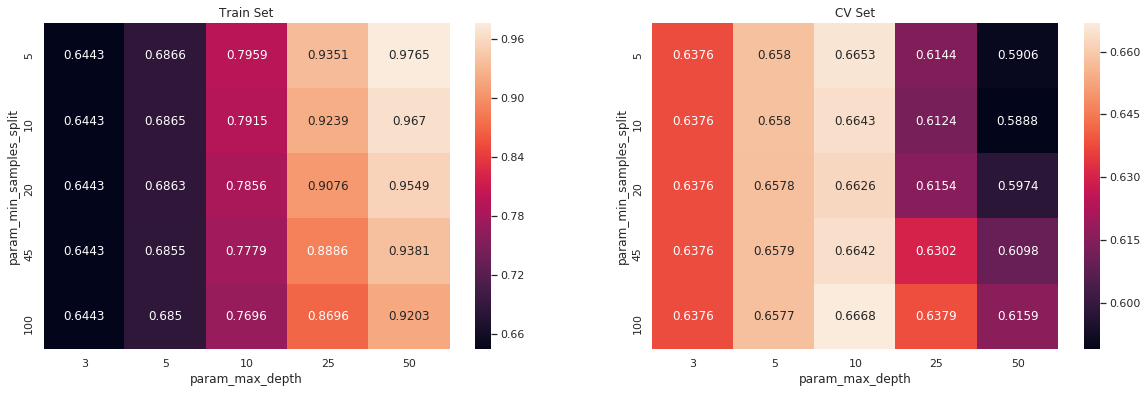

In [57]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

**Best Estimator and Best tune parameters**

---



In [72]:
print(clf1.best_estimator_)

#Mean cross-validated score of the best_estimator


print(clf1.score(X_set1_train,y_train))
print(clf1.score(X_set1_test,y_test))



DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.767633253311356
0.6624929447795084


In [0]:

#  Best tune parameters
best_tune_parameters=[{'max_depth':[10],  'min_samples_split':[100]  }  ]

In [84]:
clf1.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__presort', 'estimator__random_state', 'estimator__splitter', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

**Fitting Model to Hyper-Parameter Curve    ->    Best Max_depth-> 10    , Best Min_sample_split-> 100**




---


---



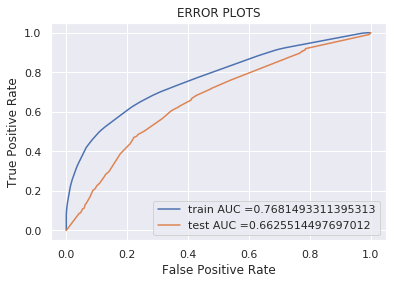

In [99]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=3,min_samples_split=100)

clf11.fit(X_set1_train, y_train)
# for visulation
clfV1.fit(X_set1_train, y_train)

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function

y_train_pred1 = clf11.predict_proba(X_set1_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set1_test) [:,1]  

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**Confusion Matrix¶**

In [79]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1   # make it global 
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
            
    predictions1= predictions
    return predictions


the maximum value of tpr*(1-fpr) 0.49 for threshold 0.37
the maximum value of tpr*(1-fpr) 0.39 for threshold 0.45


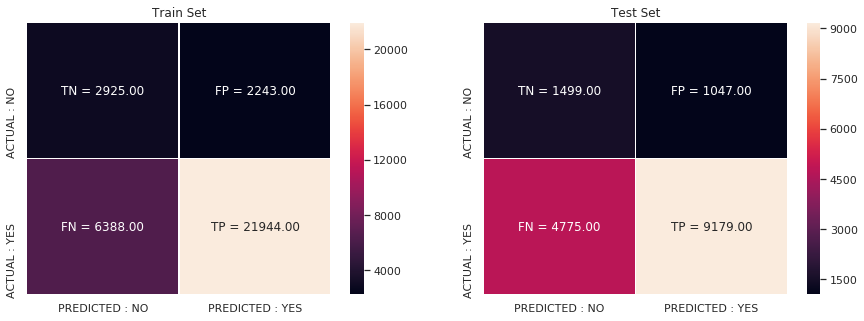

In [92]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# Visualizing Decision Tree

**Feature aggregation**

In [0]:
feature_agg_bow = f1 + f2 + f3 + f4 + f5  + fb + ft
feature_agg_tfidf = f1 + f2 + f3 + f4 + f5  + fb1 + ft1
# p is price, q is quantity, t is teacher previous year projects
feature_agg_bow.append('price')
feature_agg_tfidf.append('price')
feature_agg_bow.append('quantity')
feature_agg_tfidf.append('quantity')
feature_agg_bow.append('teacher_previous_projects')
feature_agg_tfidf.append('teacher_previous_projects')

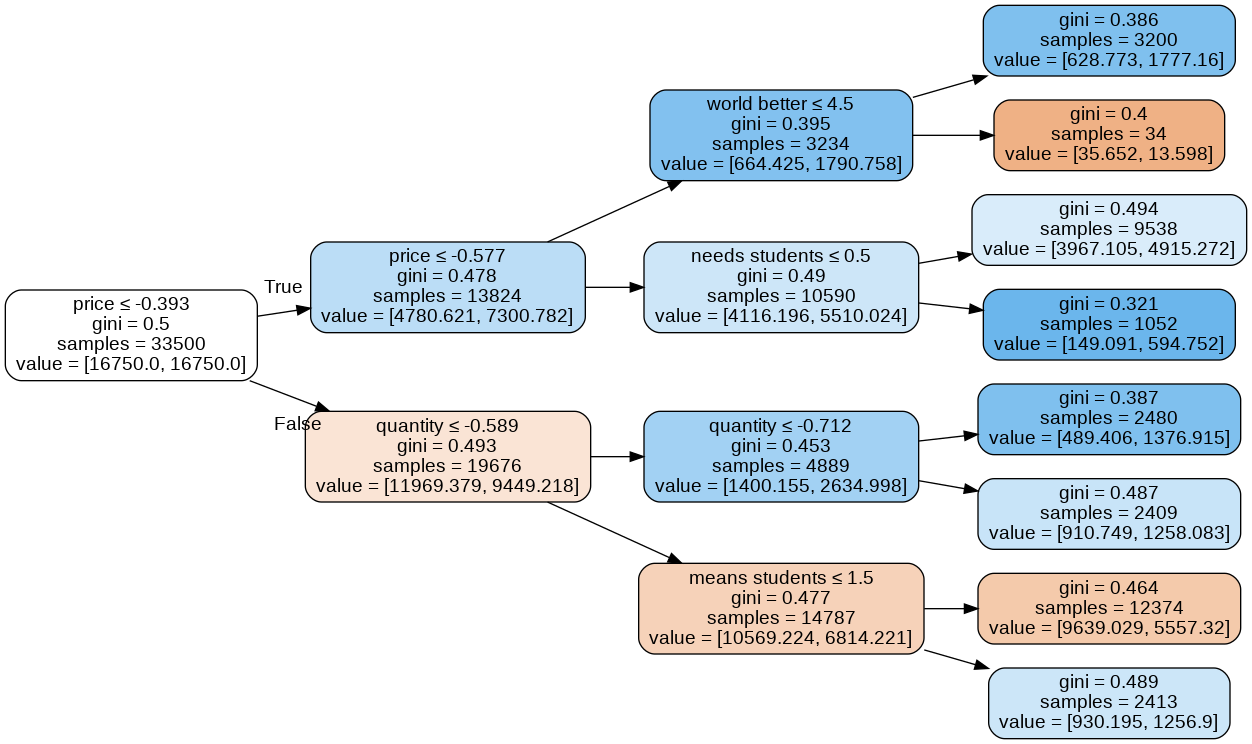

In [101]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clfV1, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_bow,rotate=True)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Some Analysis on the False positives

---



**1.   Get the False positives datapoints**

---



In [102]:
X_test['essay'].values[1]

"My students are amazing. They come from all over the world, speak dozens of languages, work hard every day, and love science! Many of my students are artistically talented, and I am excited that this project will allow them to express themselves and their understanding of science through art. My school is truly heaven, and the students I have the privilege of teaching are the best I've ever known. I'm the luckiest teacher alive. \\r\\n\\r\\nMy students rock science. My class is hands-on, always, and my students are motivated and engaged. I love watching them learn and watching them grow. My greatest hope is that each child leaves my classroom believing that science is the greatest class ever, and the kind, generous gifts DonorsChoose.org donors have given us have made that happen!This project is one of my favorite of the year. It combines fun and learning in an end-of-unit party! What could be better?!\\r\\n\\r\\nMy students are going to explore light waves and the color spectrum for 

In [0]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
  if (y_test.values[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)

In [0]:
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['essay'].values[i])

**>. Word cloud of essay**

---



Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.



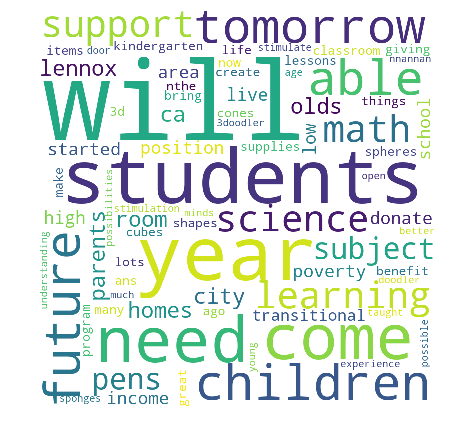

In [105]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

**DataFrame of False Positives**

---



In [0]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

In [0]:
# get the data of the false pisitives
for i in fpi :                   #          (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

In [108]:
X_test_falsePos1.head(1)
len(X_test_falsePos1)

1047

**2.  Box Plot (FP 'price')**

---


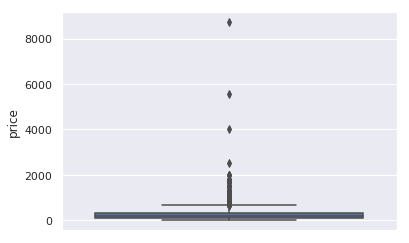

In [109]:

sns.boxplot(y='price', data=X_test_falsePos1)

**3.  PDF (FP ,teacher_number_of_previously_posted_projects)**

---


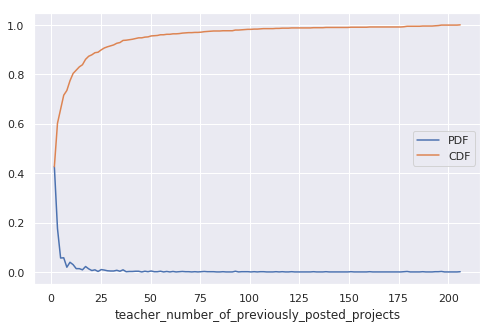

In [110]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

#2.4.2 Applying Decision trees on TFIDF,<font color='red'> SET 2</font>

In [107]:
#     Some Issues due to max_depth and min_sample_split in the grid search:
#1. If i take max_depth range upto 500 or 250 then it cause runtimeout to my google colab. thats why i took range less.

# i gave the range of the max_depth not upto 500 because with this range my colab showing runtime out.
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [3, 5, 10, 25,50], 'min_samples_split': [5, 10, 20, 45,100]}
clf2 = GridSearchCV(dt2, parameters, cv=3, scoring='roc_auc',return_train_score=True)
se2 = clf2.fit(X_set2_train, y_train)


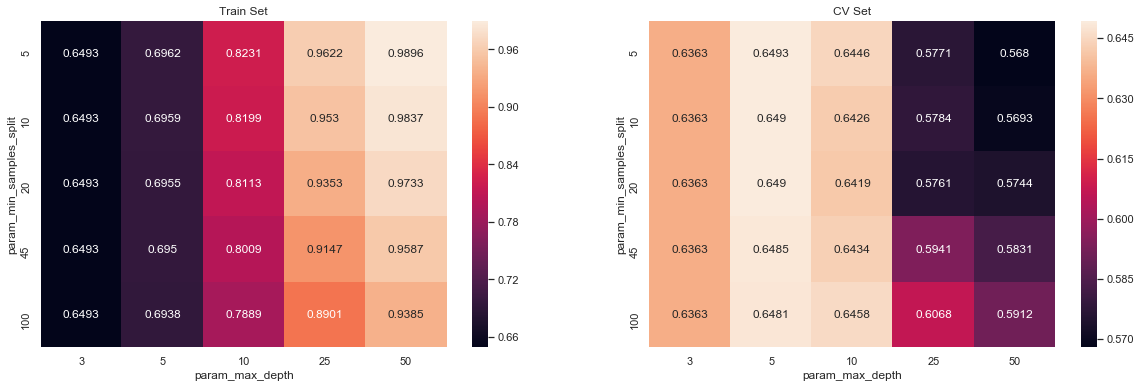

In [108]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

**Best Estimator and Best tune parameters**

---



In [112]:
print(clf2.best_estimator_)

#Mean cross-validated score of the best_estimator


print(clf2.score(X_set2_train,y_train))
print(clf2.score(X_set2_test,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6895528497544889
0.6549285015707135


In [113]:

#  Best tune parameters
best_tune_parameters=[{'max_depth':[5],  'min_samples_split':[5]  }  ]

**Fitting Model to Hyper-Parameter Curve    

---






---


---



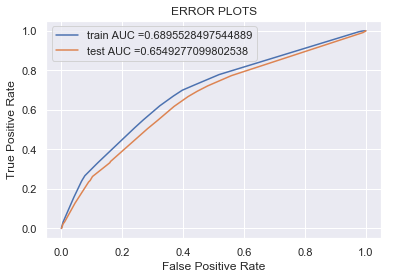

In [115]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=3,min_samples_split=5)

clf11.fit(X_set2_train, y_train)
# for visulation
clfV1.fit(X_set2_train, y_train)

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function

y_train_pred1 = clf11.predict_proba(X_set2_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set2_test) [:,1]  

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**Confusion matrix**

the maximum value of tpr*(1-fpr) 0.51 for threshold 0.43
the maximum value of tpr*(1-fpr) 0.4 for threshold 0.6


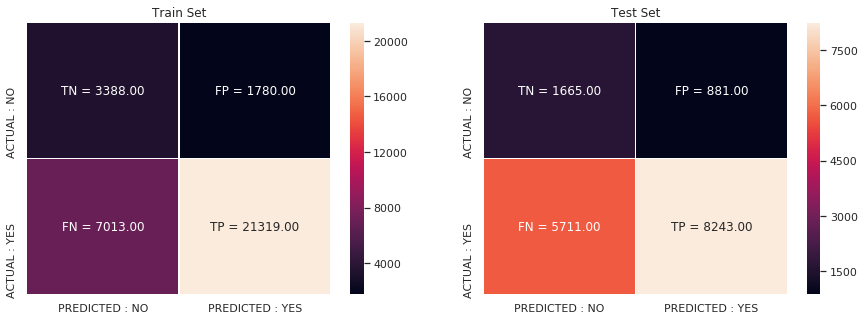

In [113]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# Visualizing Decision Tree

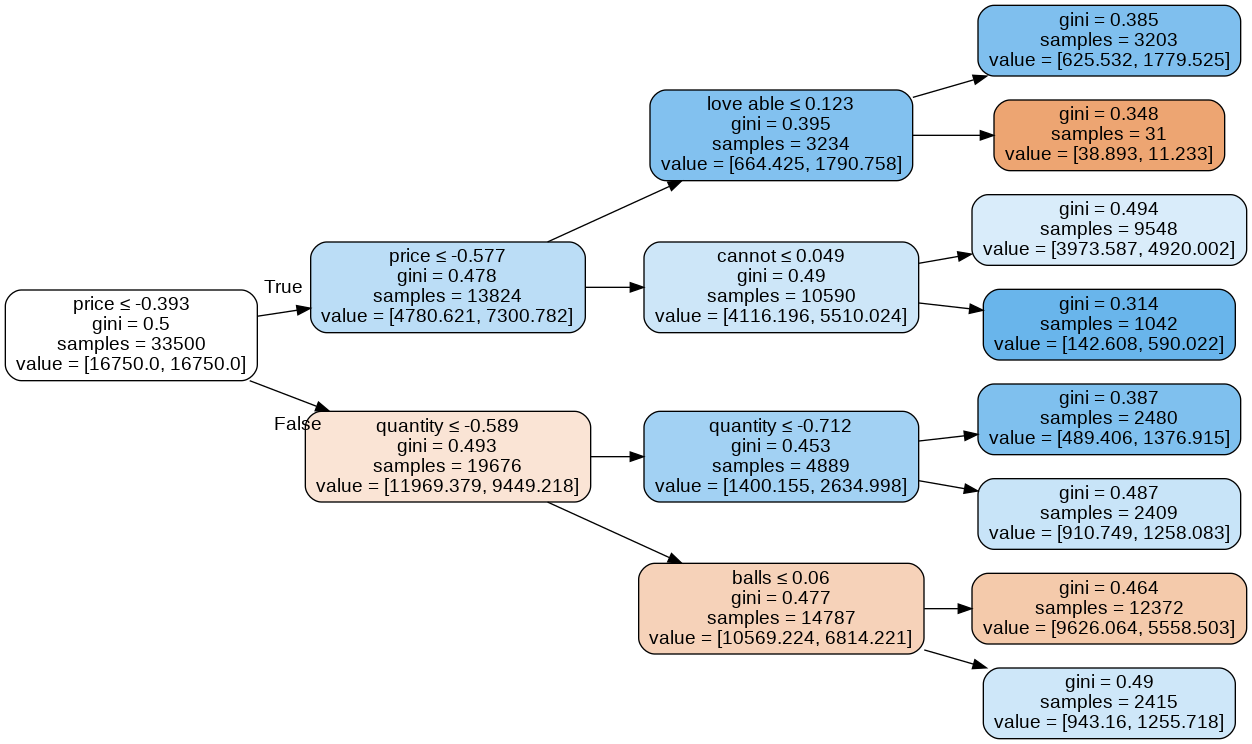

In [114]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clfV1, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_agg_bow,rotate=True)
                
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Some Analysis on the False positives

In [0]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
  if (y_test.values[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)
    
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['essay'].values[i])

**>. 1. Word cloud of essay**

---



Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.



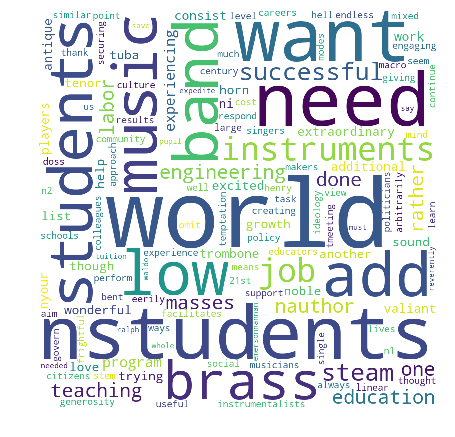

In [116]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

**DataFrame of False Positives**

---



In [0]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi :                   #          (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

**2.  Box Plot (FP 'price')**

---


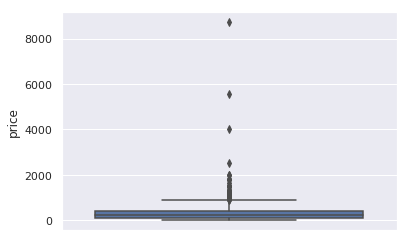

In [118]:
sns.boxplot(y='price', data=X_test_falsePos1)

**3.  PDF (FP ,teacher_number_of_previously_posted_projects)**

---


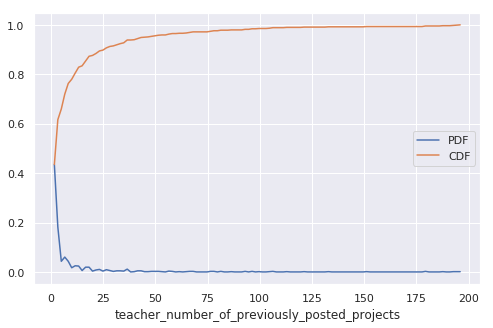

In [119]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

#2.4.3 Applying Decision trees on AVG W2V,<font color='red'> SET 3</font>

---



In [72]:
#     Some Issues due to max_depth and min_sample_split in the grid search:
#1. If i take max_depth range upto 500 or 250 then it cause runtimeout to my google colab. thats why i took range less.

# i gave the range of the max_depth not upto 500 because with this range my colab showing runtime out.
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt3= DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [3, 5, 10, 15,25], 'min_samples_split': [5, 10, 20, 25,50]}
clf3 = GridSearchCV(dt3, parameters, cv=3, scoring='roc_auc',n_jobs=4,return_train_score=True)
se3 = clf3.fit(X_set3_train, y_train)


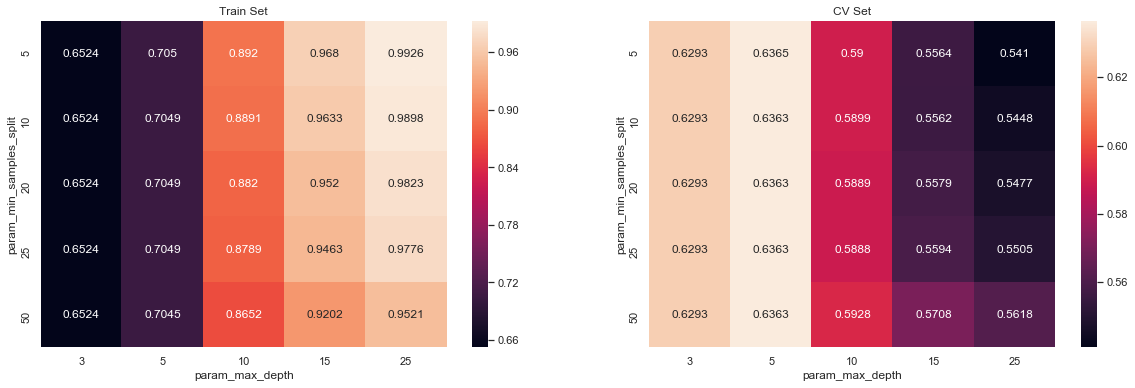

In [73]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

**Best Estimator and Best tune parameters**

---



In [75]:
print(clf3.best_estimator_)

#Mean cross-validated score of the best_estimator


print(clf3.score(X_set3_train,y_train))
print(clf3.score(X_set3_test,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6959796454724456
0.6504516177492348


In [76]:

#  Best tune parameters
best_tune_parameters=[{'max_depth':[5],  'min_samples_split':[5]  }  ]

**Fitting Model to Hyper-Parameter Curve




---


---



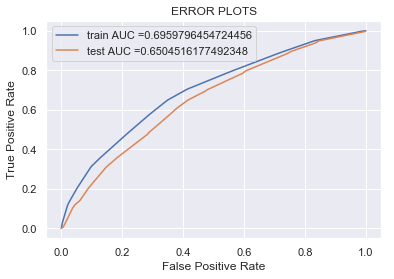

In [77]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=3,min_samples_split=5)

clf11.fit(X_set3_train, y_train)
# for visulation
clfV1.fit(X_set3_train, y_train)

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function

y_train_pred1 = clf11.predict_proba(X_set3_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set3_test) [:,1]  

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**confusion matrix  test data**

the maximum value of tpr*(1-fpr) 0.42 for threshold 0.55
the maximum value of tpr*(1-fpr) 0.38 for threshold 0.57


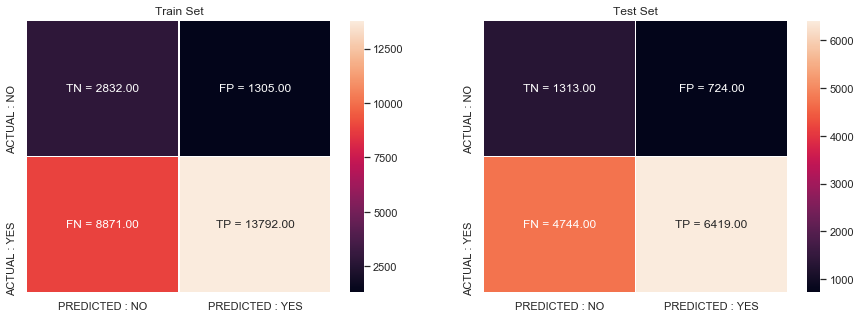

In [80]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# Some Analysis on the False positives

In [81]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
  if (y_test.values[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)
    
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['essay'].values[i])

In [83]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


**>. 1. Word cloud of essay**

---



Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.



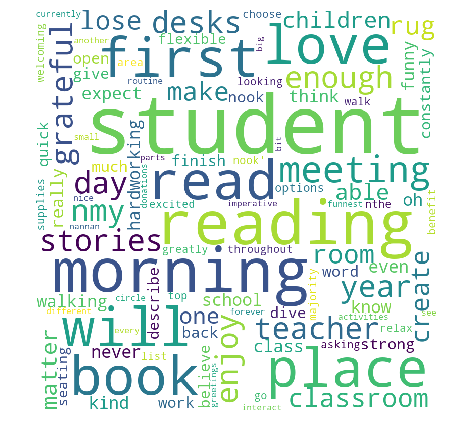

In [84]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

**DataFrame of False Positives**

---



In [85]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi :                   #          (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

**2.  Box Plot (FP 'price')**

---


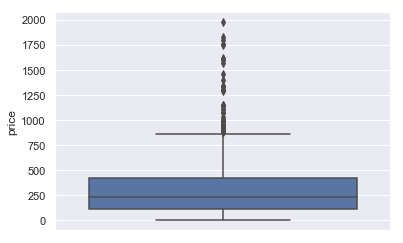

In [86]:
sns.boxplot(y='price', data=X_test_falsePos1)

**3.  PDF (FP ,teacher_number_of_previously_posted_projects)**

---


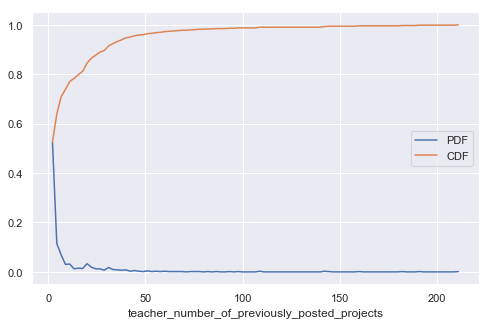

In [87]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

# Applying Decision trees on td_idf W2V, SET 4

In [91]:
#     Some Issues due to max_depth and min_sample_split in the grid search:
#1. If i take max_depth range upto 500 or 250 then it cause runtimeout to my google colab. thats why i took range less.

# i gave the range of the max_depth not upto 500 because with this range my colab showing runtime out.
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt4= DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [3, 5, 10, 15,25], 'min_samples_split': [5, 10, 20, 25,50]}
clf4 = GridSearchCV(dt4, parameters, cv=3, scoring='roc_auc',return_train_score=True)
set4= clf4.fit(X_set4_train, y_train)


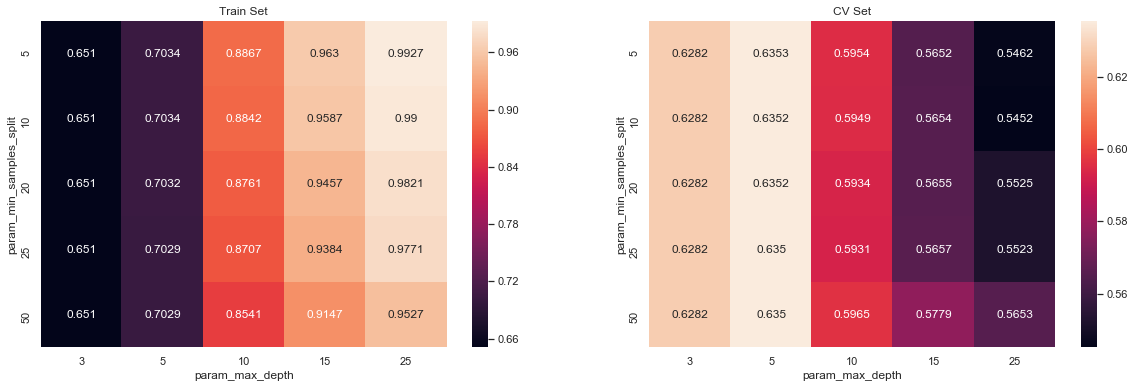

In [92]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf4.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

**Best Estimator and Best tune parameters**

---



In [93]:
print(clf4.best_estimator_)

#Mean cross-validated score of the best_estimator


print(clf4.score(X_set4_train,y_train))
print(clf4.score(X_set4_test,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6949624555889694
0.605926017691783


In [95]:

best_tune_parameters= [{'max_depth': [5],  'min_samples_split':[5]  }  ]

**Fitting Model to Hyper-Parameter Curve    **




---


---



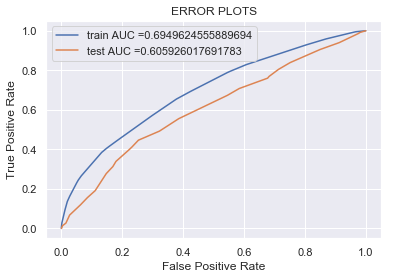

In [96]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=3,min_samples_split=5)

clf11.fit(X_set4_train, y_train)
# for visulation
clfV1.fit(X_set4_train, y_train)

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function

y_train_pred1 = clf11.predict_proba(X_set4_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set4_test) [:,1]  

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


**Confusion matrix**

the maximum value of tpr*(1-fpr) 0.41 for threshold 0.51
the maximum value of tpr*(1-fpr) 0.34 for threshold 0.51


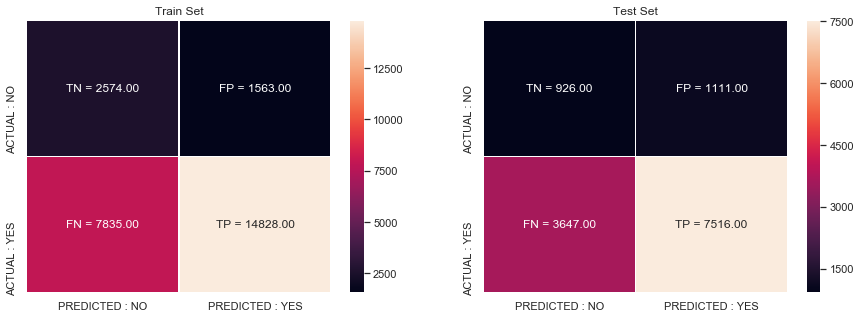

In [97]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# Some Analysis on the False positives

In [98]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
  if (y_test.values[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)
    
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['essay'].values[i])

**>. 1. Word cloud of essay**

---



Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.



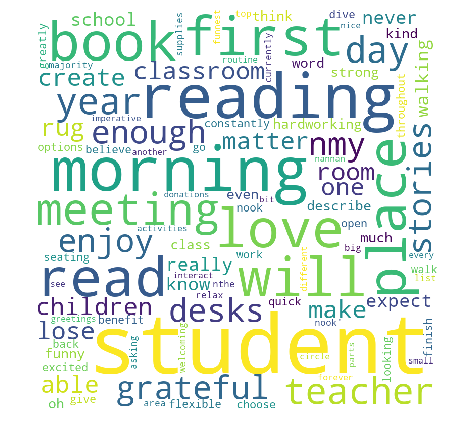

In [99]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

**2.  Box Plot (FP 'price')**

---


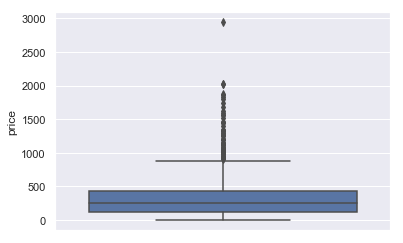

In [100]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi :                   #          (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))
  
sns.boxplot(y='price', data=X_test_falsePos1)

**3.  PDF (FP ,teacher_number_of_previously_posted_projects)**

---


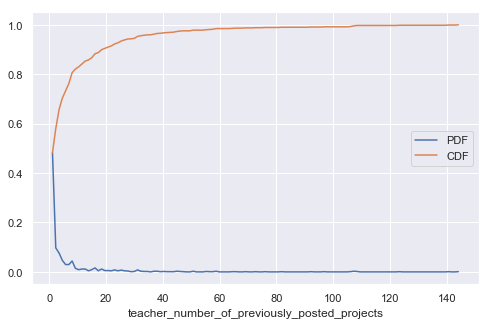

In [101]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

# Task 2:
Select 5k best features from features of Set 2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e.(Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3 
---



In [116]:
# https://datascience.stackexchange.com/questions/6683/feature-selection-using-feature-importances-in-random-forests-with-scikit-learn
#https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importances-error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
def selectKImportance(model, X, k=5):
     return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [117]:
# for tf-idf set 2  
X_set5_train = selectKImportance(clf2, X_set2_train ,5000)
X_set5_test= selectKImportance(clf2, X_set2_test, 5000)

print(X_set5_train.shape)
print(X_set5_test.shape)


(26800, 5000)
(13200, 5000)


#  Applying Decision tree on  Important features

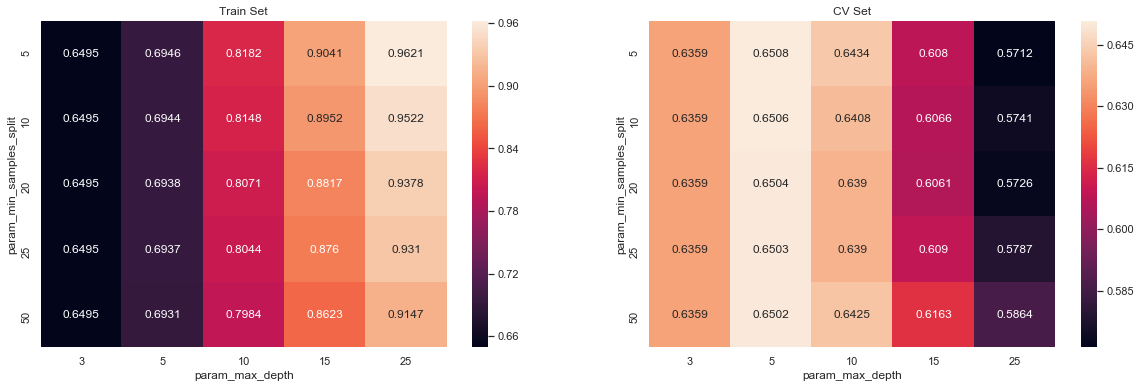

In [118]:
#     Some Issues due to max_depth and min_sample_split in the grid search:
#1. If i take max_depth range upto 500 or 250 then it cause runtimeout to my google colab. thats why i took range less.

# i gave the range of the max_depth not upto 500 because with this range my colab showing runtime out.
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt5= DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [3, 5, 10, 15,25], 'min_samples_split': [5, 10, 20, 25,50]}
clf5 = GridSearchCV(dt5, parameters, cv=3, scoring='roc_auc',return_train_score=True)
set5= clf5.fit(X_set5_train, y_train)




import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf5.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()


**Best Estimator and Best tune parameters**

---



In [119]:
print(clf5.best_estimator_)

#Mean cross-validated score of the best_estimator


print(clf5.score(X_set5_train,y_train))
print(clf5.score(X_set5_test,y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6895528497544889
0.6548389419056598


In [121]:

#  Best tune parameters
best_tune_parameters=[{'max_depth': [5],  'min_samples_split':[5]  }  ]

**Now *train* with best hyperparameter**

---



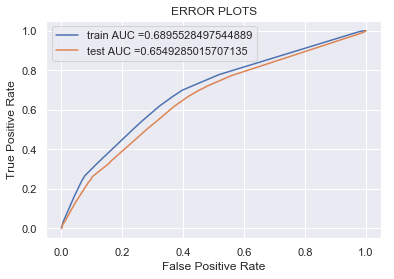

In [122]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
clf11= GridSearchCV( DecisionTreeClassifier(class_weight = 'balanced'),best_tune_parameters)
clfV1=DecisionTreeClassifier (class_weight = 'balanced',max_depth=3,min_samples_split=5)

clf11.fit(X_set5_train, y_train)
# for visulation
clfV1.fit(X_set5_train, y_train)

#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function

y_train_pred1 = clf11.predict_proba(X_set5_train) [:,1]   
y_test_pred1 =  clf11.predict_proba(X_set5_test) [:,1]  

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()


# Confusion matrix

the maximum value of tpr*(1-fpr) 0.41 for threshold 1
the maximum value of tpr*(1-fpr) 0.39 for threshold 1


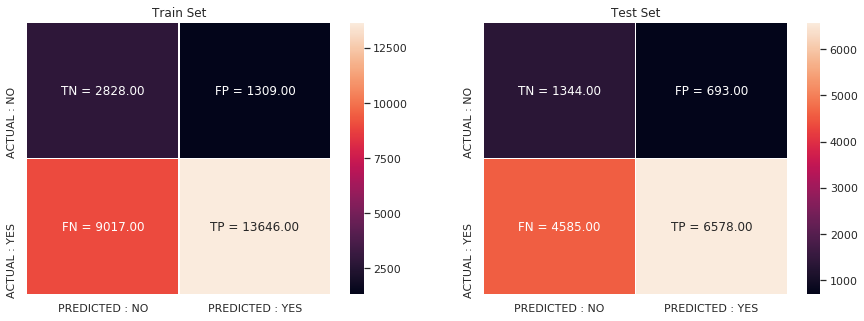

In [0]:
#https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn
import seaborn as sns; sns.set()

con_m_train = confusion_matrix(y_train, predict(y_train_pred1, tr_thresholds1, train_fpr1, train_tpr1))
con_m_test = confusion_matrix(y_test, predict(y_test_pred1, te_thresholds1, test_fpr1, test_tpr1))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_test.flatten())])).reshape(2,2)

sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

# Some Analysis on the False positives

In [0]:
#https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
#https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb
fpi = []
for i in range(len(y_test)) :
  if (y_test.values[i] == 0) & (predictions1[i] == 1) :
    fpi.append(i)
    
fp_essay1 = []
for i in fpi :
  fp_essay1.append(X_test['essay'].values[i])

**>. 1. Word cloud of essay**

---



Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.



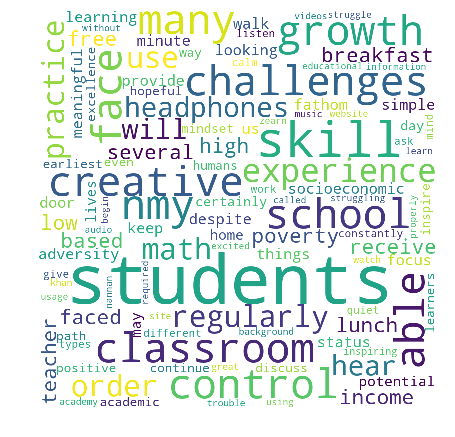

In [0]:
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in fp_essay1 :
  val = str(val)
  tokens = val.split()
  
for i in range(len(tokens)):
  tokens[i] = tokens[i].lower()
  
for words in tokens :
  comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)
  

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

**2.  Box Plot (FP 'price')**

---


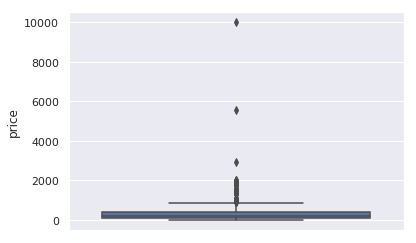

In [0]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)
# get the data of the false pisitives
for i in fpi :                   #          (in fpi all the false positives data points indexes)
  X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))
  
sns.boxplot(y='price', data=X_test_falsePos1)

**3.  PDF (FP ,teacher_number_of_previously_posted_projects)**

---


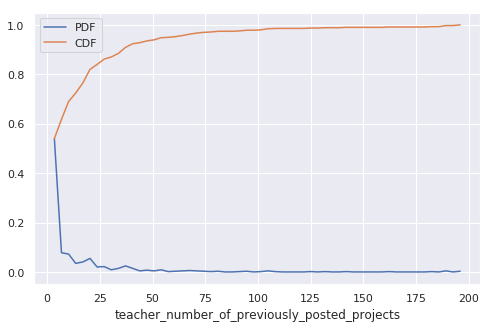

In [0]:
plt.figure(figsize=(8,5))

counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'], bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
plt.xlabel('teacher_number_of_previously_posted_projects')    
plt.show()

# <h1>3. Conclusions</h1>

In [123]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
#how to use pretty table http://zetcode.com/python/prettytable/ 
from prettytable import PrettyTable 
tb = PrettyTable()
tb.field_names= (" Vectorizer  ", "  Max_depth  ", "  Min_sample_split  ","  Test -AUC  ")
tb.add_row(["  BOW ",                    10,                     100,                            66                        ])
tb.add_row(["   Tf - Idf",                        5 ,                       5 ,                            65                      ]) 
tb.add_row(["  AVG-W2V",                       5,                       5,                             65                   ]) 
tb.add_row(["A VG -  Tf -  Idf",                     5  ,                     5 ,                             60                ]) 
tb.add_row(["Top 5000 Features",                   5,                        5 ,                            65        ]) 
print(tb.get_string(titles = "Decision trees- Observations")) #print(tb)


+-------------------+---------------+----------------------+---------------+
|    Vectorizer     |   Max_depth   |   Min_sample_split   |   Test -AUC   |
+-------------------+---------------+----------------------+---------------+
|         BOW       |       10      |         100          |       66      |
|       Tf - Idf    |       5       |          5           |       65      |
|       AVG-W2V     |       5       |          5           |       65      |
| A VG -  Tf -  Idf |       5       |          5           |       60      |
| Top 5000 Features |       5       |          5           |       65      |
+-------------------+---------------+----------------------+---------------+
